## Taiwan's Air Quality Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import Select
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


DRIVER_PATH = './/chromedriver.exe'
URL = 'https://airtw.epa.gov.tw/ENG/EnvMonitoring/Central/CentralMonitoring.aspx'

s = Service(executable_path=DRIVER_PATH)
browser = webdriver.Chrome(service=s)   
browser.get(URL)  

area_tag = browser.find_element(By.XPATH, '//select[@id="ddl_Area"]')
areas = Select(area_tag)

## Data Extraction

In [2]:
areas_list = []
county_by_area = []
sites_by_county = []

AREA = []
COUNTY = []
SITE = []
AQI = []
AVPM25 = []
AVPM10 = []
AVO3 = []
AVCO = []
SO2 = []
NO2 = []
PM25 = []
PM10 = []
O3 = []
CO = []

for option in areas.options:
    area = option.text
    areas.select_by_visible_text(area)
    print(area)
    areas_list.append(area)
    
    # select county
    county_tag = browser.find_element(By.XPATH, '//select[@id="ddl_County"]')
    counties = Select(county_tag)
    county_names = []
    for option_county in counties.options:
        county = option_county.text
        counties.select_by_visible_text(county)
        county_names.append(county)
        
        # select site
        site_tag = browser.find_element(By.XPATH, '//select[@id="ddl_Site"]')
        sites = Select(site_tag)
        site_names = []
        for option_site in sites.options:
            site = option_site.text
            sites.select_by_visible_text(f'{site}')
            site_names.append(site)
            
            button = browser.find_element(By.XPATH, '//*[@id="btn_search"]')
            button.click()
            
            aqi = browser.find_element(By.XPATH, '//*[@id="AQI"]').text
            avpm25 = browser.find_element(By.XPATH, '//*[@id="AVPM25"]').text
            avpm10 = browser.find_element(By.XPATH, '//*[@id="AVPM10"]').text
            avo3 = browser.find_element(By.XPATH, '//*[@id="AVO3"]').text
            avco = browser.find_element(By.XPATH, '//*[@id="AVCO"]').text
            so2 = browser.find_element(By.XPATH, '//*[@id="SO2"]').text
            no2 = browser.find_element(By.XPATH, '//*[@id="NO2"]').text
            pm25 = browser.find_element(By.XPATH, '//*[@id="PM25"]').text
            pm10 = browser.find_element(By.XPATH, '//*[@id="PM10"]').text
            o3 = browser.find_element(By.XPATH, '//*[@id="O3"]').text
            co = browser.find_element(By.XPATH, '//*[@id="CO"]').text
            
            AREA.append(area)
            COUNTY.append(county)
            SITE.append(site)
            AQI.append(aqi)
            AVPM25.append(avpm25)
            AVPM10.append(avpm10)
            AVO3.append(avo3)
            AVCO.append(avco)
            SO2.append(so2)
            NO2.append(no2)
            PM25.append(pm25)
            PM10.append(pm10)
            O3.append(o3)
            CO.append(co)
            
            
        sites_by_county.append(site_names)
    county_by_area.append(county_names)

browser.quit() 

North
Chu-Miao
Central
Yun-Chia-Nan
Kao-ping
Yilan
Hua-Tung
Island


In [3]:
data = {
    'AREA': AREA,
    'COUNTY': COUNTY,
    'SITE': SITE,
    'AQI': AQI,
    'AVPM25': AVPM25,
    'AVPM10': AVPM10,
    'AVO3': AVO3,
    'AVCO': AVCO,
    'SO2': SO2,
    'NO2': NO2,
    'PM25': PM25,
    'PM10': PM10,
    'O3': O3,
    'CO': CO
}

In [4]:
df = pd.DataFrame(data)

In [5]:
df.tail()

,AREA,COUNTY,SITE,AQI,AVPM25,AVPM10,AVO3,AVCO,SO2,NO2,PM25,PM10,O3,CO
73,Hua-Tung,Taitung County,Taitung,33,7,15,27,0.10,0.5,7,6,13,23,0.30
74,Hua-Tung,Taitung County,Guanshan,25,7,15,29,0.10,0.7,5,1,21,23,0.22
75,Island,Penghu County,Magong,28,6,28,29,0.10,0.7,5,1,21,23,0.22
76,Island,Kinmen County,Kinmen,31,9,17,39,0.30,1.8,7,16,Equipment Error,46,0.48
77,Island,Lienchiang County,Matsu,48,23,33,32,0.30,0.9,6,26,32,32,0.40


In [9]:
# Delete rows where 'SO2' and 'NO2' columns is equal to 'Equipment Error'
df = df[df['SO2'] != 'Equipment Error']
df = df[df['NO2'] != 'Equipment Error']
df = df[df['NO2'] != 'Equipment Calibration']
df = df[df['O3'] != 'Equipment Error']
df = df[df['CO'] != 'Equipment Error']
df = df[df['AVO3'] != 'Equipment Error']
df = df[df['AVCO'] != 'Equipment Error']
df = df[df['PM25'] != 'Equipment Error']
df = df[df['PM10'] != 'Equipment Error']
df = df[df['AVO3'] != 'Scarce data']
len(df)

72

In [11]:
df[['AQI', 'AVPM25', 'AVPM10', 'AVO3', 'SO2', 'NO2', 'PM25', 'PM10', 'O3', 'CO', 'AVCO']] = df[['AQI', 'AVPM25', 'AVPM10', 'AVO3', 'SO2', 'NO2', 'PM25', 'PM10', 'O3', 'CO', 'AVCO']].astype(float)
df.head()

,AREA,COUNTY,SITE,AQI,AVPM25,AVPM10,AVO3,AVCO,SO2,NO2,PM25,PM10,O3,CO
0,North,Keelung City,Keelung,28.0,8.0,19.0,18.0,0.2,1.3,17.0,6.0,21.0,14.0,0.39
1,North,Taipei City,Shilin,45.0,11.0,14.0,30.0,0.2,1.3,27.0,13.0,23.0,10.0,0.46
2,North,Taipei City,Datong,45.0,11.0,20.0,23.0,0.6,1.3,30.0,21.0,32.0,5.0,1.26
3,North,Taipei City,Zhongshan,43.0,7.0,13.0,31.0,0.3,0.9,26.0,7.0,21.0,9.0,0.79
4,North,Taipei City,Guting,42.0,9.0,12.0,30.0,0.2,0.6,25.0,8.0,15.0,14.0,0.60


In [12]:
df = df.groupby(by='COUNTY', as_index=False).mean()

In [13]:
df.head()

,COUNTY,AQI,AVPM25,AVPM10,AVO3,AVCO,SO2,NO2,PM25,PM10,O3,CO
0,Changhua County,48.5,14.5,36.5,17.75,0.2,2.075,9.25,18.25,39.75,27.75,0.2775
1,Chiayi City,30.0,9.0,29.0,20.00,0.2,1.300,6.00,14.00,20.00,25.00,0.2500
2,Chiayi County,45.5,13.5,31.5,21.50,0.2,0.950,7.50,12.00,22.00,27.50,0.2850
3,Hsinchu City,33.0,7.0,16.0,25.00,0.2,1.300,20.00,11.00,14.00,22.00,0.4700
4,Hsinchu County,23.0,7.0,20.0,17.00,0.2,0.100,11.00,7.00,16.00,17.00,0.2800


In [14]:
# For future execution
df.to_csv('air-quality-data.csv')

In [15]:
# For ease of execution next time, you can start here
df = pd.read_csv('air-quality-data.csv', index_col=0)
df.head()

,COUNTY,AQI,AVPM25,AVPM10,AVO3,AVCO,SO2,NO2,PM25,PM10,O3,CO
0,Changhua County,48.5,14.5,36.5,17.75,0.2,2.075,9.25,18.25,39.75,27.75,0.2775
1,Chiayi City,30.0,9.0,29.0,20.00,0.2,1.300,6.00,14.00,20.00,25.00,0.2500
2,Chiayi County,45.5,13.5,31.5,21.50,0.2,0.950,7.50,12.00,22.00,27.50,0.2850
3,Hsinchu City,33.0,7.0,16.0,25.00,0.2,1.300,20.00,11.00,14.00,22.00,0.4700
4,Hsinchu County,23.0,7.0,20.0,17.00,0.2,0.100,11.00,7.00,16.00,17.00,0.2800


## Data Visualization and Analysis

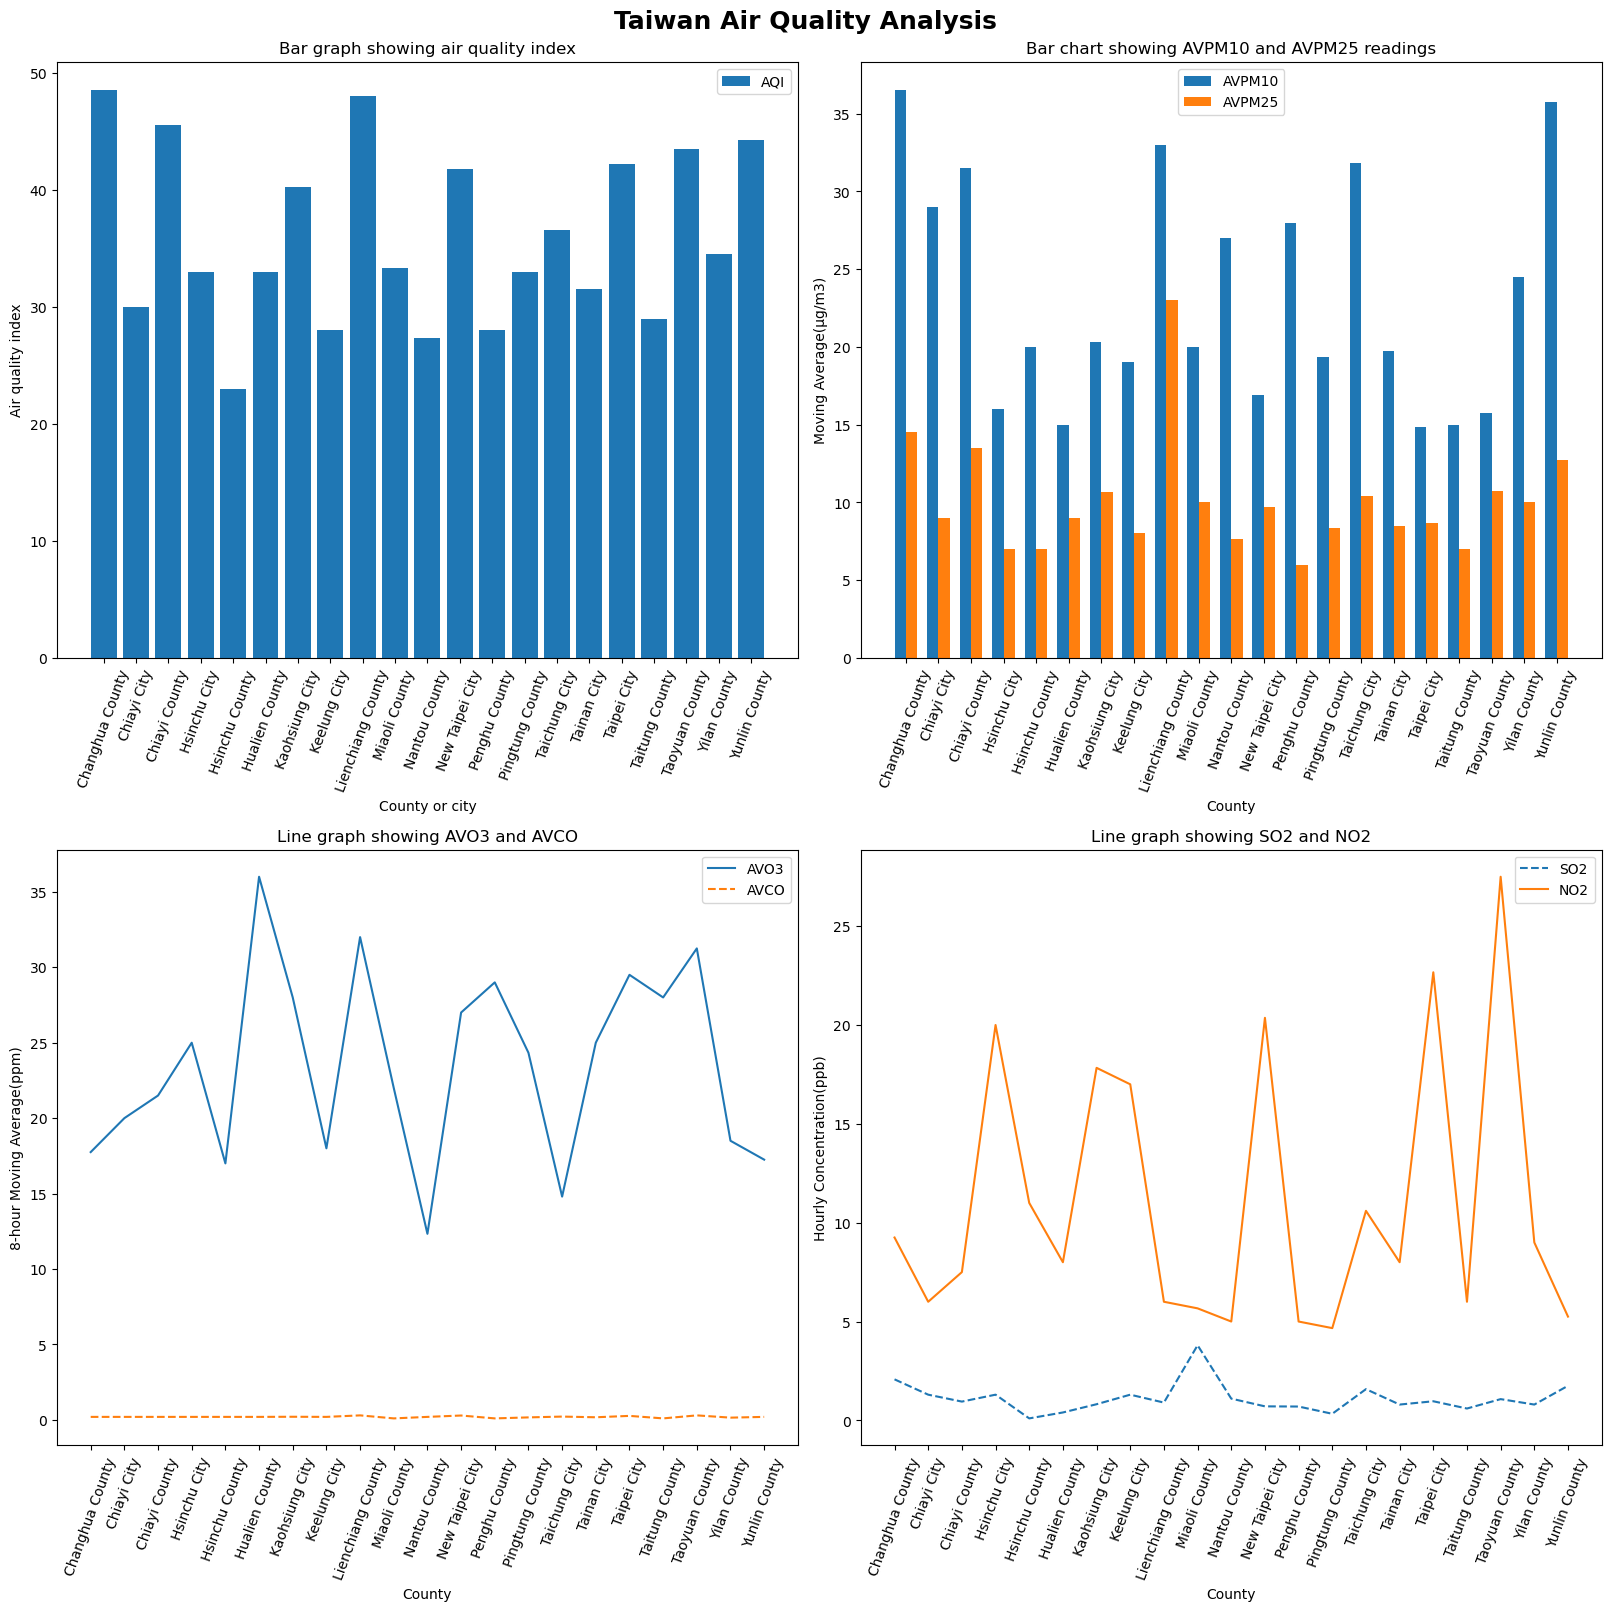

In [20]:
plt.figure(figsize = (16, 16), constrained_layout=True)

plt.subplot(221)
x = df["COUNTY"]
y = df["AQI"]
plt.bar(x, y, label='AQI')
index = np.arange(len(df.COUNTY))
plt.xticks(rotation = 70)
#Label the axis
plt.title("Bar graph showing air quality index")
plt.xlabel("County or city")
plt.ylabel("Air quality index")
# Add legend
plt.legend()

plt.subplot(222)
categories = list(df['COUNTY'])
values1 = list(df['AVPM10'])
values2 = list(df['AVPM25'])
# Set the width of each bar
bar_width = 0.35
# Calculate the positions for the bars
x = np.arange(len(categories))
# Plot the first set of bars
plt.bar(x - bar_width/2, values1, bar_width, label='AVPM10')
# Plot the second set of bars
plt.bar(x + bar_width/2, values2, bar_width, label='AVPM25')
# Set labels and titles
plt.xlabel('County')
plt.ylabel('Moving Average(μg/m3)')
plt.title('Bar chart showing AVPM10 and AVPM25 readings')
plt.xticks(x, categories, rotation = 70)
plt.legend()

plt.subplot(223)
x = df["COUNTY"]
avo3 = df["AVO3"]
avco = df["AVCO"]
plt.plot(x, avo3, label="AVO3")
plt.plot(x, avco, label="AVCO", linestyle="dashed")
index = np.arange(len(df.COUNTY))
plt.xticks(index, df.COUNTY,  rotation = 70)
# Label the axis
plt.title("Line graph showing AVO3 and AVCO")
plt.xlabel("County")
plt.ylabel("8-hour Moving Average(ppm)")
# Add legend
plt.legend()

plt.subplot(224)
x = df["COUNTY"]
so2 = df["SO2"]
no2 = df["NO2"]
plt.plot(x, so2, label="SO2", linestyle="dashed")
plt.plot(x, no2, label="NO2")
index = np.arange(len(df.COUNTY))
plt.xticks(index, df.COUNTY, rotation = 70)
# Label the axis
plt.title("Line graph showing SO2 and NO2")
plt.xlabel("County")
plt.ylabel("Hourly Concentration(ppb)")
# Add legend
plt.legend()

plt.suptitle("Taiwan Air Quality Analysis", fontsize=18, fontweight='bold')
plt.savefig("plot1.png")
plt.show()

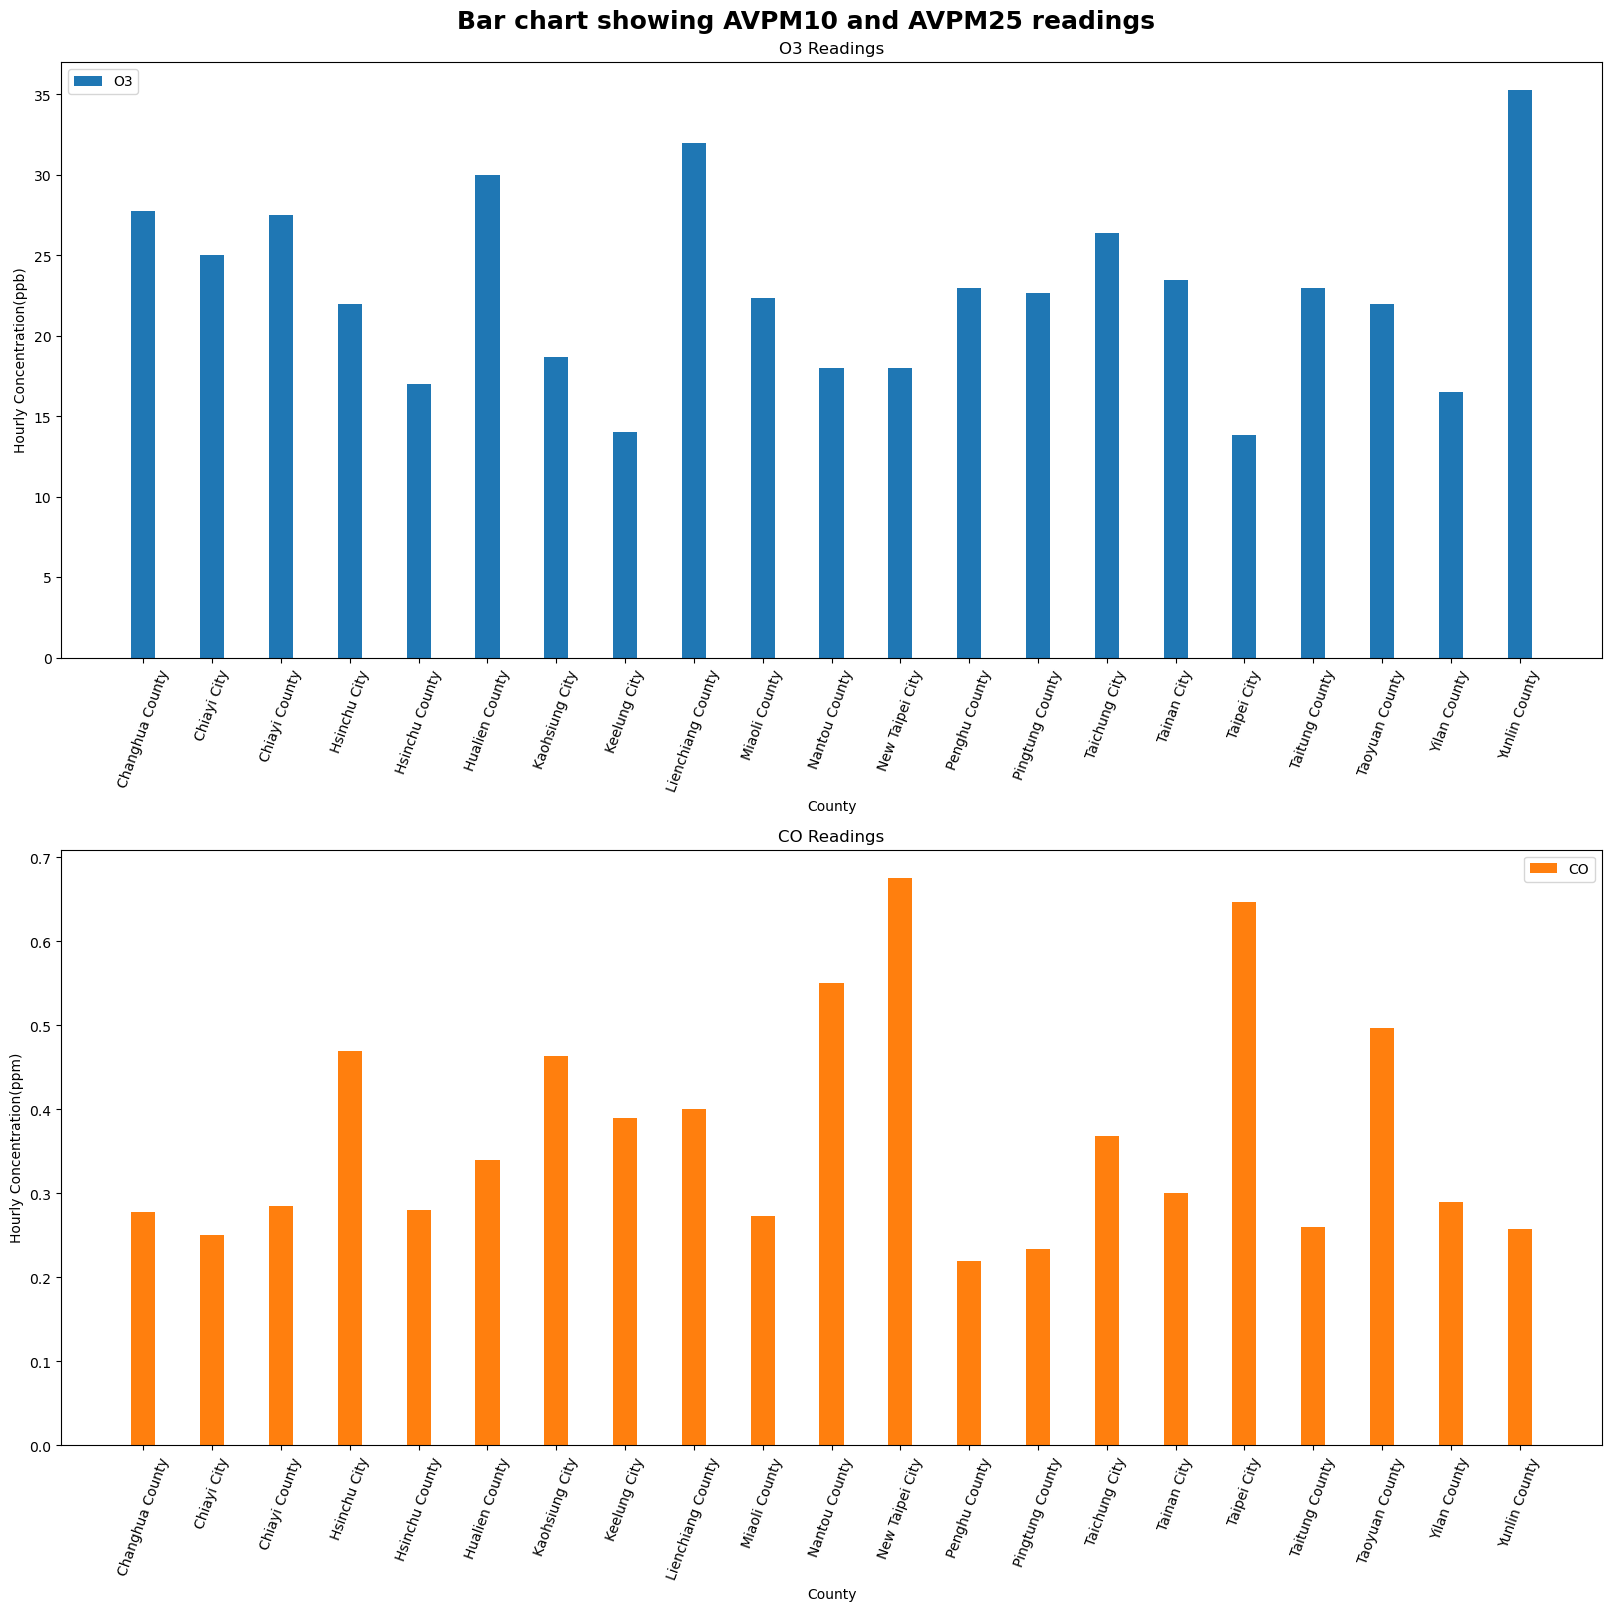

In [22]:
import matplotlib.pyplot as plt
import numpy as np

categories = list(df['COUNTY'])
values1 = list(df['O3'])
values2 = list(df['CO'])
# Set the width of each bar
bar_width = 0.35
# Calculate the positions for the bars
x = np.arange(len(categories))
# Create the figure and axes
fig, axs = plt.subplots(figsize=(16, 16), constrained_layout=True, nrows=2, ncols=1)

# Plot the first set of bars in the first subplot
axs[0].bar(x, values1, bar_width, label='O3')
# Set labels and titles for the first subplot
axs[0].set_xlabel('County')
axs[0].set_ylabel('Hourly Concentration(ppb)')
axs[0].set_title('O3 Readings')
axs[0].set_xticks(x)
axs[0].set_xticklabels(categories, rotation=70)
axs[0].legend()

# Plot the second set of bars in the second subplot
axs[1].bar(x, values2, bar_width, label='CO', color='#ff7f0e')
# Set labels and titles for the second subplot
axs[1].set_xlabel('County')
axs[1].set_ylabel('Hourly Concentration(ppm)')
axs[1].set_title('CO Readings')
axs[1].set_xticks(x)
axs[1].set_xticklabels(categories, rotation=70)
axs[1].legend()

# Set the overall title for the figure
plt.suptitle("Bar chart showing AVPM10 and AVPM25 readings", fontsize=18, fontweight='bold')
plt.savefig("plot2.png")
plt.show()


## Analyse based on specific area

In [ ]:
area = input()
county = input()

In [ ]:
browser = webdriver.Chrome(service=s)   
browser.get(URL) 

AQI = []
AVPM25 = []
AVPM10 = []
AVO3 = []
AVCO = []
SO2 = []
NO2 = []
PM25 = []
PM10 = []
O3 = []
CO = []

area_tag = browser.find_element(By.XPATH, '//select[@id="ddl_Area"]')
areas = Select(area_tag)
areas.select_by_visible_text(area)
county_tag = browser.find_element(By.XPATH, '//select[@id="ddl_County"]')
counties = Select(county_tag)
counties.select_by_visible_text(county)
time_tag = browser.find_element(By.XPATH, '//*[@id="ddl_Time"]')
times = Select(time_tag)

timestamps = []

for option in times.options:
    time = option.text
    times.select_by_visible_text(time)
    timestamps.append(time)

    button = browser.find_element(By.XPATH, '//*[@id="btn_search"]')
    button.click()

    aqi = browser.find_element(By.XPATH, '//*[@id="AQI"]').text
    avpm25 = browser.find_element(By.XPATH, '//*[@id="AVPM25"]').text
    avpm10 = browser.find_element(By.XPATH, '//*[@id="AVPM10"]').text
    avo3 = browser.find_element(By.XPATH, '//*[@id="AVO3"]').text
    avco = browser.find_element(By.XPATH, '//*[@id="AVCO"]').text
    so2 = browser.find_element(By.XPATH, '//*[@id="SO2"]').text
    no2 = browser.find_element(By.XPATH, '//*[@id="NO2"]').text
    pm25 = browser.find_element(By.XPATH, '//*[@id="PM25"]').text
    pm10 = browser.find_element(By.XPATH, '//*[@id="PM10"]').text
    o3 = browser.find_element(By.XPATH, '//*[@id="O3"]').text
    co = browser.find_element(By.XPATH, '//*[@id="CO"]').text

    AQI.append(aqi)
    AVPM25.append(avpm25)
    AVPM10.append(avpm10)
    AVO3.append(avo3)
    AVCO.append(avco)
    SO2.append(so2)
    NO2.append(no2)
    PM25.append(pm25)
    PM10.append(pm10)
    O3.append(o3)
    CO.append(co)
    
browser.quit()


In [ ]:
data = {
    'AQI': AQI,
    'AVPM25': AVPM25,
    'AVPM10': AVPM10,
    'AVO3': AVO3,
    'AVCO': AVCO,
    'SO2': SO2,
    'NO2': NO2,
    'PM25': PM25,
    'PM10': PM10,
    'O3': O3,
    'CO': CO
}
timestamps = pd.to_datetime(timestamps)

df = pd.DataFrame(data, index=timestamps)
df.index.name = "date"

df = df[df['SO2'] != 'Equipment Error']
df = df[df['SO2'] != 'Equipment Calibration']
df = df[df['NO2'] != 'Equipment Error']
df = df[df['SO2'] != 'Equipment Calibration']
df = df[df['SO2'] != 'Equipment Error']
df = df[df['O3'] != 'Equipment Error']
df = df[df['O3'] != 'Equipment Calibration']
df = df[df['CO'] != 'Equipment Error']
df = df[df['CO'] != 'Equipment Calibration']
df = df[df['PM25'] != 'Equipment Error']
df = df[df['PM25'] != 'Equipment Calibration']
df = df[df['PM10'] != 'Equipment Error']
df = df[df['PM10'] != 'Equipment Calibration']
df = df[df['AVO3'] != 'Scarce data']

df = df.astype(float)

In [23]:
# You can use this previous data as an alternative to crawling new data for faster execution
df = pd.read_csv('data.csv', index_col=0)

In [24]:
df.head()

,AQI,AVPM25,AVPM10,AVO3,AVCO,SO2,NO2,PM25,PM10,O3,CO
date,,,,,,,,,,,
2023-06-14 13:00:00,36.0,11.0,13.0,24.0,0.2,0.2,1.0,9.0,8.0,37.0,0.13
2023-06-14 12:00:00,40.0,12.0,16.0,21.0,0.2,0.5,1.0,8.0,8.0,38.0,0.12
2023-06-14 11:00:00,40.0,12.0,16.0,21.0,0.2,0.5,1.0,8.0,8.0,38.0,0.12
2023-06-14 10:00:00,43.0,13.0,18.0,16.0,0.2,1.6,2.0,12.0,13.0,39.0,0.16
2023-06-14 09:00:00,42.0,13.0,22.0,8.0,0.2,3.3,14.0,13.0,20.0,24.0,0.19


## Explore covariance

In [25]:
covariance_matrix = df.cov()
# Extract the covariance between X and y
covariance_xy = covariance_matrix.iloc[:-1, 0]
print("Covariance between X and y:")
print(covariance_xy)

Covariance between X and y:
AQI       65.231677
AVPM25    15.346170
AVPM10    10.652795
AVO3      37.580124
AVCO       0.082981
SO2        1.391366
NO2       -1.206211
PM25      17.015114
PM10       7.155280
O3        31.113043
Name: AQI, dtype: float64


## Pearson correlation coefficient

In [26]:
target = 'AQI'
X = df.drop(columns=target)
y = df[target]
X.corrwith(y)

AVPM25    0.751508
AVPM10    0.285480
AVO3      0.396671
AVCO      0.204766
SO2       0.378565
NO2      -0.033246
PM25      0.602053
PM10      0.130740
O3        0.257013
CO        0.092556
dtype: float64

In [27]:
target = 'AQI'
X = df.drop(columns=target)
y = df[target]

correlation = X.corrwith(y)
correlation
# Choosing the best features with coefficients > 0.1
features_to_drop = []
for key, val in dict(correlation).items():
    if val < 0.1:
        features_to_drop.append(key)

X = X.drop(columns=features_to_drop)
X.head()

,AVPM25,AVPM10,AVO3,AVCO,SO2,PM25,PM10,O3
date,,,,,,,,
2023-06-14 13:00:00,11.0,13.0,24.0,0.2,0.2,9.0,8.0,37.0
2023-06-14 12:00:00,12.0,16.0,21.0,0.2,0.5,8.0,8.0,38.0
2023-06-14 11:00:00,12.0,16.0,21.0,0.2,0.5,8.0,8.0,38.0
2023-06-14 10:00:00,13.0,18.0,16.0,0.2,1.6,12.0,13.0,39.0
2023-06-14 09:00:00,13.0,22.0,8.0,0.2,3.3,13.0,20.0,24.0


## Linear Regression Model

In [28]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 2.39980926  0.53090074  0.46453318 -9.76053617  1.62085988 -0.16922085
 -0.23507685 -0.0596848 ]
Intercept: 0.22780173723030117


In [31]:
# Evaluate the model
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 8.898137523768364
Mean Absolute Error (MAE): 2.5280530702322275
R-squared Score: 0.8473467839821096


In [32]:

# Predict the target variable
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 8.006064290610201
Mean Absolute Error (MAE): 2.149764850871463
R-squared Score: 0.8976438119047052


In [ ]:
# The model is specific, it is accurate for the area from which the training data was obtained.

In [ ]:
# Save data to csv file for future easier execution
df.to_csv('data.csv')